# Sample plot of Greenhouse Gas Emissions in NYC
## by Denis Khryashchev (dk2926)

In [1]:
# Importing libraries to open and store the data, statistics and plotting
import geopandas as gp
import pandas as pd
import os
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Allowing plotting inside the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading Energy consumption data
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [3]:
# Reading PLUTO data from the shapefile
bsize = gp.GeoDataFrame.from_file("MNMapPLUTO.shp")

In [4]:
# Creating the function that checks if the value can be converted into a float number, or not
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [5]:
#create the indeces array here
#indx = ...
# Creating the indeces array
ind_TGE=(np.vectorize(canconvert)(nrg['Total GHG Emissions(MtCO2e)'])) 
nrg['Total GHG Emissions(MtCO2e)'][~ind_TGE]=float('NaN')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'] 
bblnrgdata = pd.merge(nrg, bsize, how='inner', on=['BBL'])
bblnrgdata['GHG'] = bblnrgdata['Total GHG Emissions(MtCO2e)'].astype(float)

C:\Anaconda2\lib\site-packages\pandas\core\index.py:1840: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
C:\Anaconda2\lib\site-packages\pandas\core\index.py:1116: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


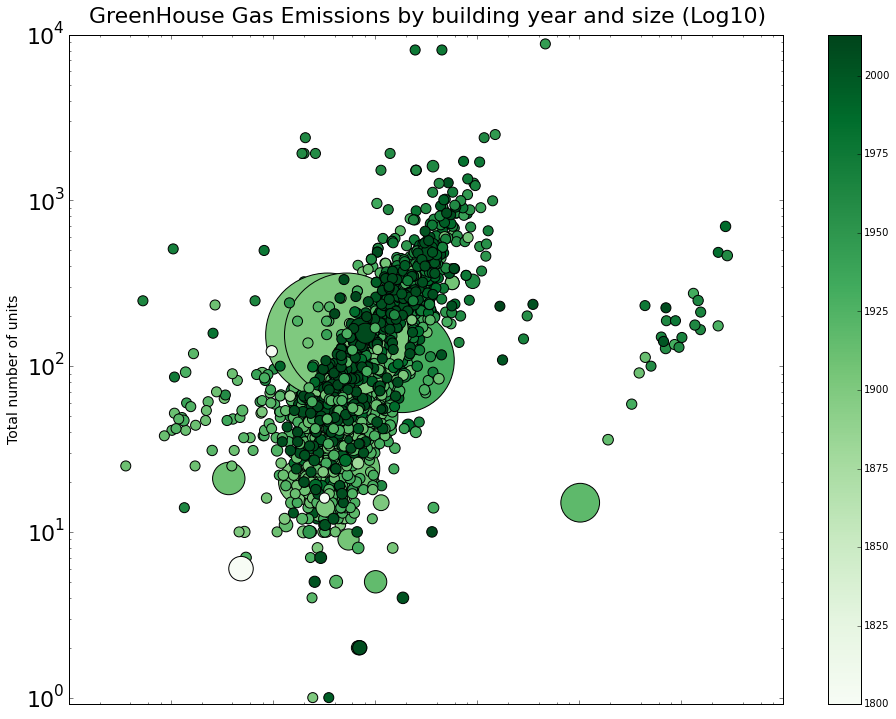

In [7]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800
fig = plt.figure(figsize=(16,12))
ax = bblnrgdata.plot(kind='scatter', x ='GHG', y='UnitsTotal', fontsize=22, colormap='Greens', alpha = 1, marker='o',  figsize=(16, 12), loglog=True,  xlim=(1,1e7), ylim=(0,1e4), c=bblnrgdata['YearBuilt'], 
                        s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
ax.set_xlabel('Total GHG Emissions', size=14)
ax.set_ylabel('Total number of units', size=14)
ax.set_title('GreenHouse Gas Emissions by building year and size (Log10)', size=22, y=1.01)
# Showing if there are any patterns involving the year the building was built